In [121]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain # Pradeep Elance https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [112]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

## Exploring the Data

In [113]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [120]:
houses_train['Alley']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2046    NaN
2047    NaN
2048    NaN
2049    NaN
2050    NaN
Name: Alley, Length: 2051, dtype: object

In [119]:
houses_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [4]:
houses_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Text(0, 0.5, 'Price')

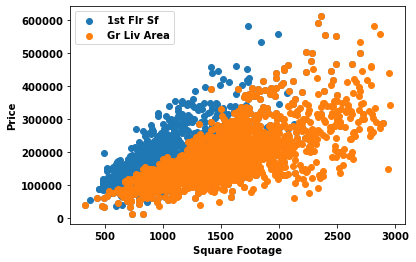

In [92]:
plt.scatter(houses_train['1st Flr SF'], houses_train['SalePrice']);
plt.scatter(houses_train['Gr Liv Area'], houses_train['SalePrice'])
plt.legend(labels=['1st Flr Sf', 'Gr Liv Area'])
plt.xlabel('Square Footage')
plt.ylabel('Price')

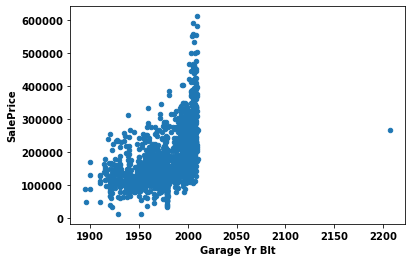

In [88]:
houses_train.plot(x='Garage Yr Blt', y='SalePrice', kind='scatter')

Garages can't be built in the future, so we'll remove that row.

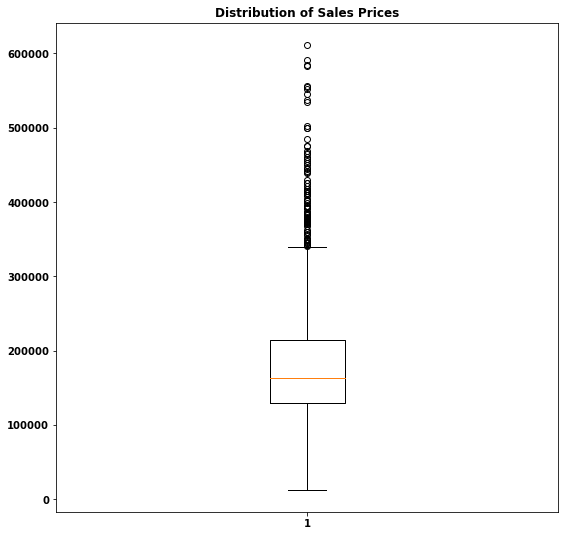

In [6]:
plt.figure(figsize=(9, 9))
plt.boxplot(houses_train['SalePrice'])
plt.title('Distribution of Sales Prices');

### Features that could benefit from log transformation

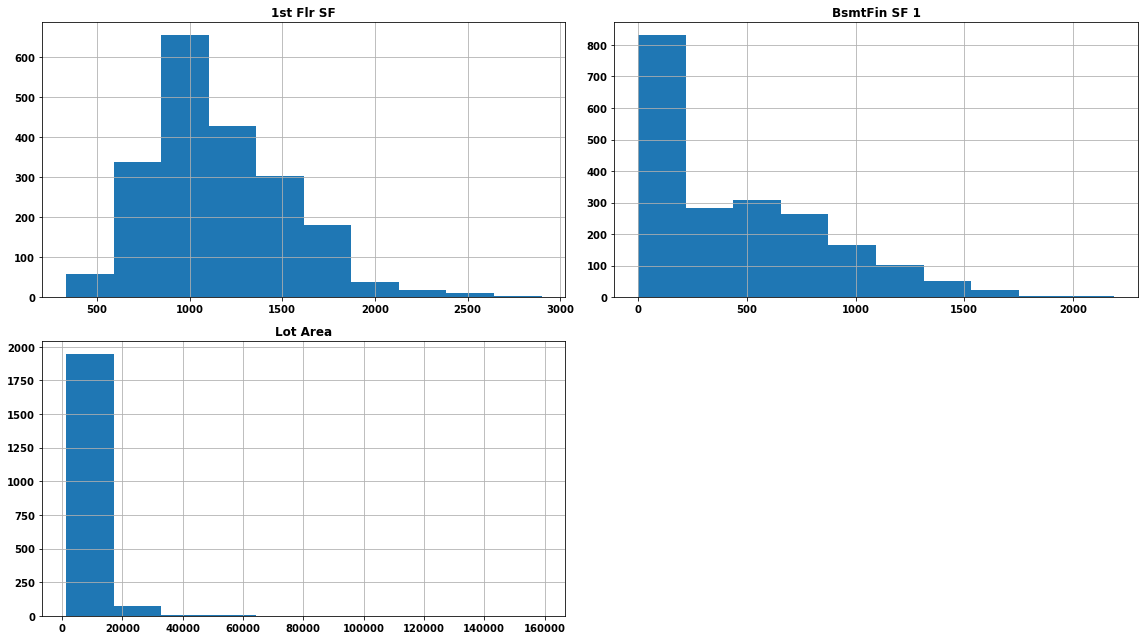

In [70]:
columns_to_log = ['BsmtFin SF 1', '1st Flr SF', 'Lot Area']
houses_train[columns_to_log].hist(figsize=(16,9))
plt.tight_layout();

These columns are all right-skewed, so logarithmic transformation should balance these out a bit to make them more useful features

In [104]:
# houses_train['total_house_sf'] = houses_train[['1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF']].sum(axis=1)

In [109]:
# houses_train['total_house_sf_x_overall_qual'] = houses_train[['1st Flr SF', '2nd Flr SF', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF']].sum(axis=1) * houses_train['Overall Qual']

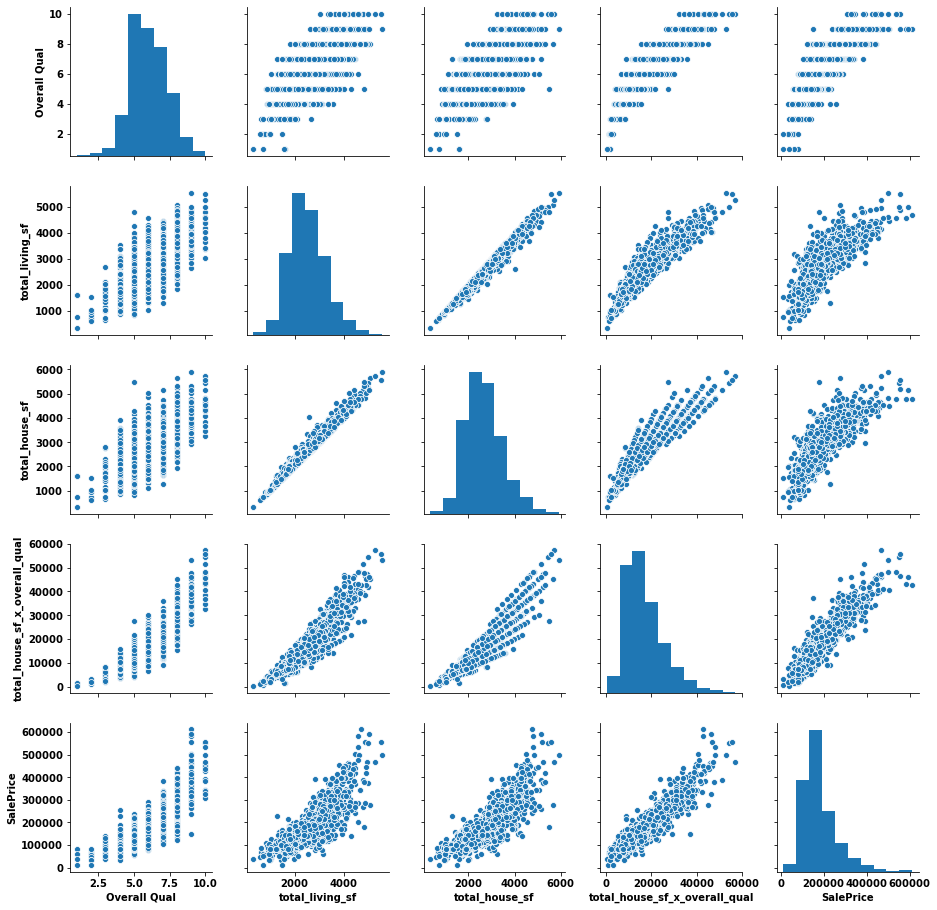

In [110]:
# sns.pairplot(houses_train[['Overall Qual', 'total_living_sf', 'total_house_sf', 'total_house_sf_x_overall_qual', 'SalePrice']])

### Removing Outliers
* Homes over 4000 in 1st Flr SF
* Homes over 4000 in Gr Liv Area
* Garage with Year built 2207

In [7]:
houses_train = remove_outliers(houses_train)

#### Imputing missing data with the mean or mode, depending on whether the data is categorical or continuous

In [9]:
imp_data(houses_train)

## Feature Engineering

### Mapping Ordinals

### Creating Dummies

In [20]:
# columns_to_log = ['BsmtFin SF 1', '1st Flr SF', 'Lot Area']
# log_col(houses_10p_to_90p, columns_to_log)
# # # log_col(houses_train, '2nd Flr SF')
# # # log_col(houses_train, 'Total Bsmt SF')
# # # for column in houses_train:
# # #     log_col(houses_train, column)

In [71]:
houses_train.shape

(2034, 270)

In [22]:
# houses_10p_to_90p.shape

### Choosing Features

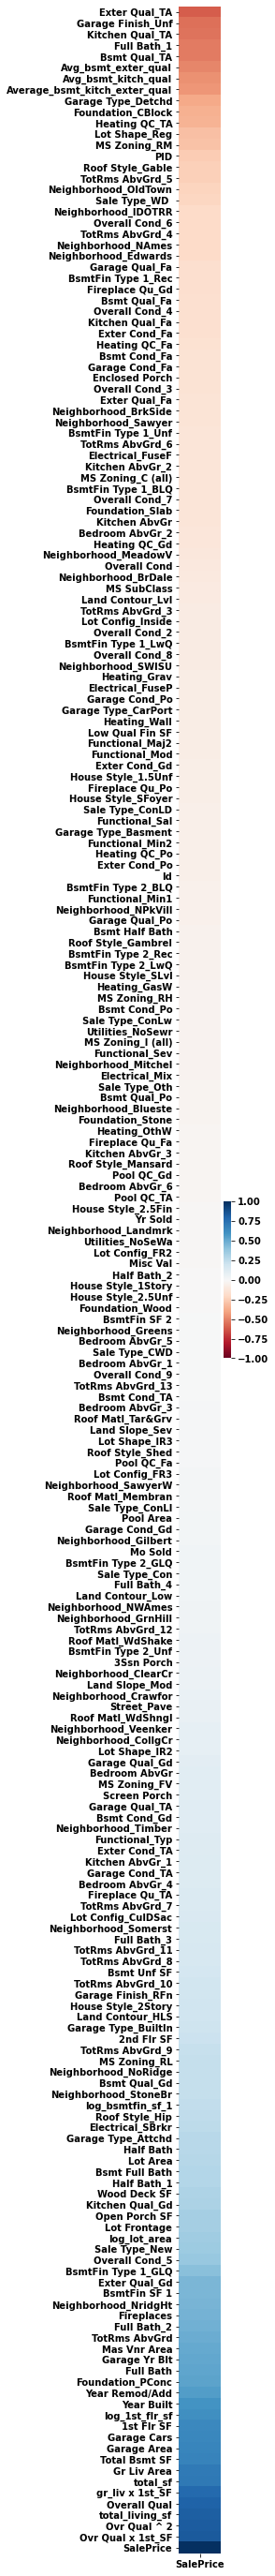

In [95]:
plt.figure(figsize=(1, 50))
sns.heatmap(houses_train.corr()[['SalePrice']].sort_values(by='SalePrice'), vmin=-1, vmax=1, cmap='RdBu');

In [26]:
def random_feature_thresh_test(data, target, threshold_start):
    best_threshold = 0
    best_score = float('inf')
    outlier_indices = [1796, 125]
    for i in range(0, 10):
        mean_corr = data.corr()[target].mean()
        feature_threshold = threshold_start + (i / 10)
        abs_value_greater_than_thresh = abs(data.corr()['SalePrice']) > mean_corr * feature_threshold
        # EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
        strong_corr_features = data[data.corr().columns[abs_value_greater_than_thresh]]

        features = list(strong_corr_features[1:])
        features_not_in_list = ['SalePrice', 'PID', 'Id'
                               ]
        features = [feature for feature in features if feature not in features_not_in_list]

        X = data[[col for col in features if col in houses_test]].drop(outlier_indices)
        y = data[target].drop(outlier_indices)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        lr.score(X_test, y_test)
        score = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if score < best_score:
            print(score)
            print("^^NEW HIGH SCORE^^")
            best_score = score
            best_threshold = feature_threshold
    return f'The best score was {best_score}, the best threshold was {best_threshold}.'
    

In [27]:
random_feature_thresh_test(houses_train, 'SalePrice', 0.5)

25324.83155447974
^^NEW HIGH SCORE^^
24962.177469048595
^^NEW HIGH SCORE^^
24841.535939614787
^^NEW HIGH SCORE^^
24816.377229228172
^^NEW HIGH SCORE^^
24815.17534021471
^^NEW HIGH SCORE^^


'The best score was 24815.17534021471, the best threshold was 1.1.'

In [28]:
def get_features(data, threshold):
    mean_corr = houses_train.corr()['SalePrice'].mean()
    abs_value_greater_than_thresh = abs(data.corr()['SalePrice']) > mean_corr * threshold
    # EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
    strong_corr_features = data[data.corr().columns[abs_value_greater_than_thresh]]

    features = list(strong_corr_features[1:])
    features_not_in_list = ['SalePrice', 'PID', 'Id']
    try:
        return [feature for feature in features if feature not in features_not_in_list]
    except:
        features_not_in_list = ['PID', 'Id']
        return [feature for feature in features if feature not in features_not_in_list]

In [29]:
features_all = get_features(houses_train, 1.3)
len(features_all)

146

## Prepping model for Kaggle Submission

In [30]:
# Garage Cars was type int64 in houses_test, was type float in houses_train_pol_scale
houses_test['Garage Cars'] = houses_test['Garage Cars'].apply(lambda x: float(x))

In [31]:
# Thanks Will Badr for this! https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
imp_data(houses_test)

In [32]:
category_to_bool_cols(houses_test, nominal_categories)

In [33]:
poly_features(houses_test)

In [34]:
log_col(houses_test, columns_to_log)

In [35]:
houses_test.shape

(878, 256)

In [36]:
X_real_test = houses_test[[col for col in features_all if col in houses_test]]
X_real_test.shape

(878, 141)

## Testing!!

### Splitting the Data

In [37]:
outlier_indices = [1796, 125]
X_all = houses_train[[col for col in features_all if col in houses_test]].drop(outlier_indices)
y_all = houses_train['SalePrice'].drop(outlier_indices)
X_all.shape

(2032, 141)

In [38]:
X_all.fillna(0, inplace=True)

In [39]:
def get_cval_score_mse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    resids = y_test - y_pred
    print(f'The Cross Validation Score is: {cross_val_score(lr, X_train, y_train)}')
    print(f'The R2 score on testing data is: {lr.score(X_test, y_test)}')
    print(f'The MSE is {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    return X_train, X_test, y_train, y_test
    
    

In [40]:
X_train, X_test, y_train, y_test = get_cval_score_mse(X_all, y_all)

The Cross Validation Score is: [ 0.90507836  0.91760826 -1.12919907  0.92712391  0.91724045]
The R2 score on testing data is: 0.924789267075037
The MSE is 19467.103581465515


In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
cross_val_score(lr, X_train, y_train)

array([ 0.90507836,  0.91760826, -1.12919907,  0.92712391,  0.91724045])

In [43]:
y_pred = lr.predict(X_test)

In [44]:
lr.score(X_test, y_test)

0.924789267075037

In [45]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

19467.103581465515

In [46]:
resids = y_test - y_pred

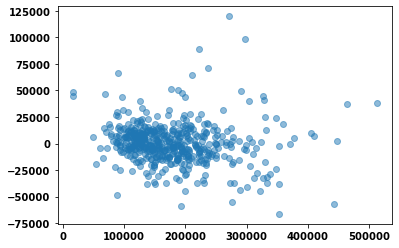

In [47]:
plt.scatter(y_pred, resids, alpha=0.5)

In [48]:
X_all.shape

(2032, 141)

## Training model on all data

In [49]:
lr.fit(X_all, y_all)

LinearRegression()

In [50]:
len(lr.predict(X_real_test))

878

In [51]:
len(X_real_test)

878

In [52]:
houses_test['SalePrice'] = lr.predict(X_real_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

,Id,SalePrice
count,878.000000,878.000000
mean,1444.749431,179143.460663
std,850.838263,76556.416815
min,2.000000,33189.854523
25%,692.250000,127298.934966
50%,1433.000000,161027.827437
75%,2197.500000,212657.204014
max,2928.000000,617769.672120


In [53]:
submission.to_csv('./submissions/test37.csv', index=False)